# Linear Regression Lab

This workbook is to accompany the PDF on Moodle. I will go through a simple linear regression example, then ask you to build multiple different ones. I will build the model by referring to the PDF

step 1, import the things we probably always want

In [637]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

These ones are not for always, but I like this plotting style for this workbook

In [638]:
import matplotlib
matplotlib.style.use('ggplot')

Let's take this set

X has values 5,7,9,11,13,15
y has 11,14,20,24,29,31

and we want to build a model
$\hat{y} = w_0 + w_1x$

In [639]:
X = np.array([5, 7, 9, 11, 13, 15])
y = np.array([11, 14, 20, 24, 29, 31])

Let's plot it to see if a linear model makes sense for this

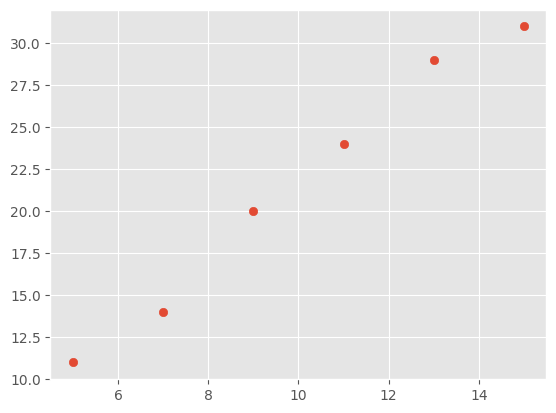

In [640]:
plt.scatter(X,y)
plt.show()

We can check the correlation coefficient (if you don't know what this, don't worry about it

In [641]:
np.corrcoef(X, y)

array([[1.        , 0.99322298],
       [0.99322298, 1.        ]])

0.99322, very high correlation!

## Referring to section 2 Data Structure of the PDF let's look at X and y in more detail

In [642]:
y.shape

(6,)

In [643]:
y.ndim

1

y is clearly a 1d array, as expected - good

In [644]:
X.shape

(6,)

In [645]:
X.ndim

1

X is also a 1d array, not good. It needs to be a 2d array

In [646]:
X

array([ 5,  7,  9, 11, 13, 15])

It's written as one row, but really we need 6 rows with one entry in each row. Let's reshape the array

In [647]:
X = X.reshape(-1,1)

In [648]:
X.shape

(6, 1)

In [649]:
X.ndim

2

2d array. Good. Let's look at it

In [650]:
X

array([[ 5],
       [ 7],
       [ 9],
       [11],
       [13],
       [15]])

6 rows now

## Section 3, build the model

In [651]:
from sklearn.linear_model import LinearRegression

In [652]:
LinearRegression

sklearn.linear_model._base.LinearRegression

Create the model, with sklearn you initialise the model with an "empty constructor" of the base form of the model. LinearRegression is the constructor

In [653]:
model = LinearRegression()

Now "fit" the model using x and y. Use an appropriate ? after method name to see. .fit expects the X part to be a matrix, but we have a 1 dimensional array. Pay attention to the error message when you just do x,y

In [654]:
model.fit(X,y)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


## Section 4 Inferences

In [655]:
model.coef_

array([2.12857143])

In [656]:
model.intercept_

np.float64(0.2142857142857153)

There are the parameters

$\hat{y} = 0.2142857142857153 + 2.12857143 x$

is the model

In [657]:
w0 = model.intercept_
w1 = model.coef_[0]

In [658]:
predictions = w0 + np.dot(w1,X).reshape(1,-1)

In [659]:
predictions

array([[10.85714286, 15.11428571, 19.37142857, 23.62857143, 27.88571429,
        32.14285714]])

Using the built in .predict

In [660]:
pred = model.predict(X)

In [661]:
pred

array([10.85714286, 15.11428571, 19.37142857, 23.62857143, 27.88571429,
       32.14285714])

In [662]:
pred == predictions

array([[ True,  True,  True,  True,  True,  True]])

They're the same.

## Section 5 Evaluation

In this section, we are using the same data we trained the model on to also evaluate it.

When you fit a linear model and then compute quantities on the same data, you are answering questions of the form: "Given this dataset, how well does this model explain the observed variation?"

From a statistical perspective, this is entirely legitimate. However, we are doing a module on Machine Learning so the scores are very optimistic and should not really be used to make machine learning decisions.

PDF Section 5 should be read with this workbook

In [663]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2

In [664]:
mse(y,pred)

0.723809523809522

In [665]:
r2(y,pred)

0.9864918906909576

Very close to 1!

Root Mean Squared Error

In [666]:
rmse = np.sqrt(mse(y,pred))

In [667]:
rmse

np.float64(0.8507699593953244)

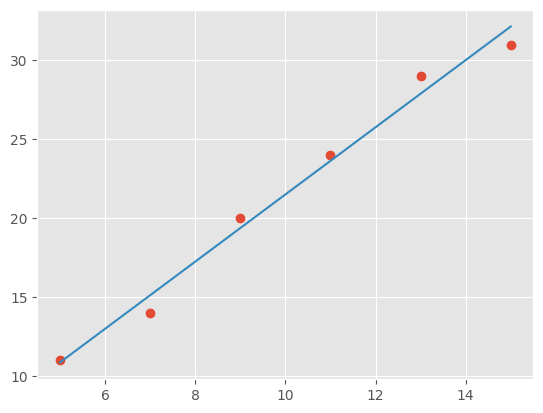

In [668]:
plt.plot(X,y,'o')
plt.plot(X,pred)
plt.show()

shows the line of best fit

In [669]:
model.score(X,y)

0.9864918906909576

Agrees with the r2 from above

# Work for you now

We assume that the value of cars goes down with age, can we make a model that will predict the value of a particular type of car, just by looking at its age

This is a collection of data for a particular make and model of car. The person collecting the data recorded the age of a car and its value. 

You should notice there are cars that are 5 years of age yet have different values, this is because there is variance that our model is not capturing but maybe it can show some interesting things

In [670]:
X=np.array([5,4,6,5,5,5,6,6,2,7,7])
y=np.array([85,103,70,82,89,98,66,95,169,70,48])

Go build and evaluate a model for this

In [671]:
X = X.reshape(-1,1)

In [672]:
pred = model.predict(X)

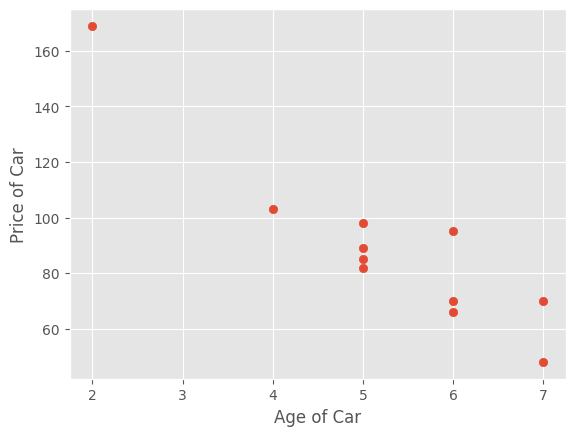

In [673]:
plt.scatter(X,y)
plt.xlabel("Age of Car")
plt.ylabel("Price of Car")

plt.show()

In [674]:
model = LinearRegression()
model.fit(X,y)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [675]:
print(f"Coefficient: {model.coef_[0]}")
print(f"Intercept: {model.intercept_}")
print(f"R^2: {model.score(X,y)}")
print(f"RMSE: {np.sqrt(mse(y,model.predict(X)))}")

Coefficient: -20.26126126126126
Intercept: 195.46846846846847
R^2: 0.8533733463785714
RMSE: 11.3759376497921


## Section 6 Model Selection

Section 6 of PDF is this. It follows on from Monday's lecture.

We are going to first of all generate a new dataset that has 3 features $x_1$, $x_2$ and $x_3$

Then we are going to evaluate multiple models and choose the "best" one, select a model to use

In [676]:
## This generates some X and y for us to use
np.random.seed(0)
n = 500
x1 = np.random.normal(size=n)          # strong predictor
x2 = np.random.normal(size=n) * 0.5    # weak predictor
x3 = np.random.normal(size=n)          # noise
y = 3*x1 + 0.5*x2 + np.random.normal(scale=0.5, size=n)

X = np.column_stack([x1, x2, x3])


### Why Validation and not Test?
As we are going to make a decision about which model to use, we cannot use a "test" set. 

Always use validation to make decisions.

You may need to import the train_test_split function (from sklearn.model_selection import train_test_split)

The code below will give us two sets, Training and Validation, 30% of the set will be validation and I am setting the random_state for reproducibility

In [677]:
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

The below will make a model using the first column only i.e.

$$ \hat{y} = w_0 + w_1x_1 $$

it will then get the score for the model for both training and validation sets

In [678]:
model = LinearRegression().fit(X_train[:, [0]], y_train)
train_r2 = model.score(X_train[:, [0]], y_train)
val_r2 = r2_score(y_val, model.predict(X_val[:, [0]]))
print(f"{'x1':15s} | Train R2: {train_r2:.3f} | Val R2: {val_r2:.3f}")

x1              | Train R2: 0.963 | Val R2: 0.976


You now want to make more models, try the following ones
$$ \hat{y} = w_0 + w_1x_2$$
$$ \hat{y} = w_0 + w_1x_1 + w_2x_2$$
$$ \hat{y} = w_0 + w_1x_1 + w_2x_2 + w_3x_3$$

Which of the models performs best in the validation set?

Does that correlate with the training score?

In [679]:
model_x2 = LinearRegression().fit(X_train[:, [1]], y_train)
train_r2 = model_x2.score(X_train[:, [1]], y_train)
val_r2 = r2_score(y_val, model_x2.predict(X_val[:, [1]]))
print(f"{'x2':15s} | Train R2: {train_r2:.3f} | Val R2: {val_r2:.3f}")

x2              | Train R2: 0.001 | Val R2: -0.056


In [680]:
cols = [0, 1]
model_x1x2 = LinearRegression().fit(X_train[:, cols], y_train)
train_r2 = model_x1x2.score(X_train[:, cols], y_train)
val_r2 = r2_score(y_val, model_x1x2.predict(X_val[:, cols]))
print(f"{'x1 + x2':15s} | Train R2: {train_r2:.3f} | Val R2: {val_r2:.3f}")

x1 + x2         | Train R2: 0.971 | Val R2: 0.978


In [681]:
cols = [0, 1, 2]
model_all = LinearRegression().fit(X_train[:, cols], y_train)
train_r2 = model_all.score(X_train[:, cols], y_train)
val_r2 = r2_score(y_val, model_all.predict(X_val[:, cols]))
print(f"{'x1 + x2 + x3':15s} | Train R2: {train_r2:.3f} | Val R2: {val_r2:.3f}")

x1 + x2 + x3    | Train R2: 0.972 | Val R2: 0.977


### Model Comparison Results

From the three models evaluated:
* **Model 1:** $\hat{y} = w_0 + w_1x_2$ 
  * **Result:** Val $R^2$ is **-0.056**. This is the worst performer and indicates **underfitting** because it lacks the strong predictor ($x_1$).
* **Model 2:** $\hat{y} = w_0 + w_1x_1 + w_2x_2$ 
  * **Result:** Val $R^2$ is **0.978**. This is the **optimal fit**, providing the best generalization on unseen data.
* **Model 3:** $\hat{y} = w_0 + w_1x_1 + w_2x_2 + w_3x_3$
  * **Result:** While this model had the highest Training $R^2$, the Validation $R^2$ dropped to **0.977**.

**Conclusion:** The third model's performance does not correlate with its training score. The drop in validation accuracy suggests it is **overfitting** to the noise ($x_3$).

## Simple linear regression with automobile data
We will now use sklearn to to predict automobile milesage per gallon (mpg) and evaluate these predictions. We first load the data and split them into a training set and a validation set.

In [682]:
#load mtcars
dfcars=pd.read_csv("mtcars.csv")
dfcars=dfcars.rename(columns={"Unnamed: 0":"name"})
dfcars.head()

,name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


Split your data into a training set and a validation set

In [683]:
X = dfcars.drop('mpg', axis=1) # this removes the 'mpg' column from the dataframe and assigns the rest to X
y = dfcars['mpg'] # this assigns the 'mpg' column to y

# split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

We need to choose the variables that we think will be good predictors for the dependent variable `mpg`. 

>**EXERCISE:**  Pick one variable to use as a predictor for simple linear regression.  Create a markdown cell below and discuss your reasons.  You may want to justify this with some visualizations.  Is there a second variable you'd like to use as well, say for multiple linear regression with two predictors?

We could pick weight as heavier cars require more energy to move so as weight goes up, MPG usually goes down. We could also pick horsepower as these cars are more powerful resulting in the engines consuming more fuel. 

> **EXERCISE:** With sklearn fit the training data using simple linear regression. 

> Plot the data and the prediction.  

>Print out the mean squared error and r2 score for the sets

In [684]:
#your code here
#define  predictor and response for set
X_train_simple = X_train[['wt']]
X_val_simple = X_val[['wt']]

In [685]:
#your code here
# create linear regression object with sklearn
model_simple = LinearRegression()

#your code here
# train the model and make predictions
model_simple.fit(X_train_simple, y_train)
y_train_pred = model_simple.predict(X_train_simple)
y_val_pred = model_simple.predict(X_val_simple)


mse_simple = mean_squared_error(y_val, y_val_pred)
r2_simple = r2_score(y_val, y_val_pred)

# Print out coefficients and metrics
print(f"Intercept (w0): {model_simple.intercept_:.3f}")
print(f"Slope (w1 for wt): {model_simple.coef_[0]:.3f}")
print("-" * 30)
print(f"Simple Model Validation MSE: {mse_simple:.3f}")
print(f"Simple Model Validation R2:  {r2_simple:.3f}")


Intercept (w0): 37.044
Slope (w1 for wt): -5.356
------------------------------
Simple Model Validation MSE: 9.089
Simple Model Validation R2:  0.733


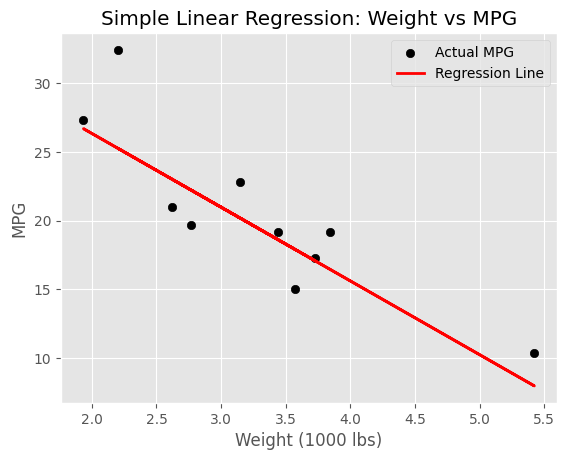

In [686]:
# your code here
# Plot outputs
plt.scatter(X_val_simple, y_val, color='black', label='Actual MPG')

plt.plot(X_val_simple, y_val_pred, color='red', linewidth=2, label='Regression Line')

plt.xlabel('Weight (1000 lbs)')
plt.ylabel('MPG')
plt.title('Simple Linear Regression: Weight vs MPG')
plt.legend()
plt.show()

## Multiple linear regression with automobile data

> **EXERCISE:** With sklearn, fit the training data using multiple linear regression with two predictors.  Use the model to make mpg predictions.

>How do these mean squared errors compare to those from the simple linear regression?

>Time permitting, repeat the training and testing with three predictors and calculate the mean squared errors.  How do these compare to the errors from the one and two predictor models?

In [687]:
#your code here
cols2 = ['wt', 'hp']
X_train_multi2 = X_train[cols2]
X_val_multi2 = X_val[cols2]

# 2. Fit the model
model_multi2 = LinearRegression()
model_multi2.fit(X_train_multi2, y_train)

# 3. Make predictions
y_val_pred2 = model_multi2.predict(X_val_multi2)

# 4. Calculate MSE and R2
mse2 = mean_squared_error(y_val, y_val_pred2)
r2_2 = r2_score(y_val, y_val_pred2)

print(f"Two Predictors (wt, hp) - Validation MSE: {mse2:.3f}")
print(f"Two Predictors (wt, hp) - Validation R2:  {r2_2:.3f}")

Two Predictors (wt, hp) - Validation MSE: 6.361
Two Predictors (wt, hp) - Validation R2:  0.813


In [688]:
# 1. Define three predictors
cols3 = ['wt', 'hp', 'cyl']
X_train_multi3 = X_train[cols3]
X_val_multi3 = X_val[cols3]

# 2. Fit the model
model_multi3 = LinearRegression()
model_multi3.fit(X_train_multi3, y_train)

# 3. Make predictions
y_val_pred3 = model_multi3.predict(X_val_multi3)

# 4. Calculate MSE
mse3 = mean_squared_error(y_val, y_val_pred3)
r2_3 = r2_score(y_val, y_val_pred3)

print(f"Three Predictors (wt, hp, cyl) - Validation MSE: {mse3:.3f}")
print(f"Three Predictors (wt, hp, cyl) - Validation R2:  {r2_3:.3f}")

Three Predictors (wt, hp, cyl) - Validation MSE: 5.586
Three Predictors (wt, hp, cyl) - Validation R2:  0.836


In [ ]:
print("--- MODEL PERFORMANCE COMPARISON ---")
# Simple 
print(f"1 Predictor (wt):      MSE = {mean_squared_error(y_val, y_val_pred):.3f}")

# Two Predictors
print(f"2 Predictors (wt+hp):  MSE = {mse2:.3f}")

# Three Predictors
print(f"3 Predictors (wt+hp+cyl): MSE = {mse3:.3f}")

--- MODEL PERFORMANCE COMPARISON ---
1 Predictor (wt):      MSE = 9.089
2 Predictors (wt+hp):  MSE = 6.361
3 Predictors (wt+hp+cyl): MSE = 5.586


### Model Performance Comparison

| Model | Predictors | Validation MSE | Validation $R^2$ |
| :--- | :--- | :--- | :--- |
| **Simple** | `wt` | 9.089 | 0.733 |
| **Multiple (2)** | `wt`, `hp` | 6.361 | 0.813 |
| **Multiple (3)** | `wt`, `hp`, `cyl` | 5.586 | 0.836 |

#### **Analysis of Results**

* **Improvement with Complexity:** As we moved from 1 predictor (`wt`) to 2 predictors (`wt` and `hp`), the **Mean Squared Error (MSE) decreased significantly** (from 9.089 to 6.361). This indicates that the model is making more accurate predictions because it has more relevant information to work with. The $R^2$ score also increased from 0.733 to 0.813, showing that more of the variance in MPG is being explained.
* **Diminishing Returns:** When adding the third predictor (`cyl`), the MSE decreased further to 5.586. However, the drop was smaller than the previous jump. This suggests a **diminishing return** where each new variable adds progressively less unique information to the model.
* **Connection to Section 6:** These results reflect the trade-off discussed in Section 6. While adding more variables improves performance metrics, we must be careful to only include variables that provide real signal. If we were to continue adding many more variables, we would eventually risk **overfitting**, where the training error continues to drop but the validation error begins to rise.

# Diabetes Dataset

Now we are going to do similar with the diabetes dataset built into sklearn

In [690]:
from sklearn import datasets
diabetes = datasets.load_diabetes()
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


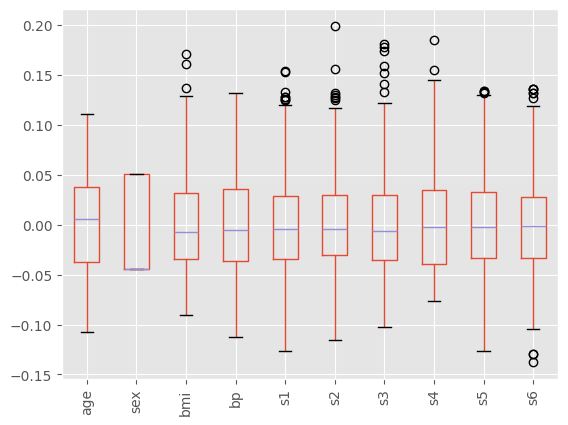

In [691]:
data = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
data.boxplot(rot=90)
data.head()

Above I put the data into a pandas dataframe and then tried to visualise it. You will notice all of the data is in a similar range

### Normalised data
They all have a mean of 0 and standard deviation of 1. This is called Normalising the data and is a common step that I'll get into later on.

The obvious one you'll notice is the sex variable. This has two options which are 0.050680 or -0.044642, when usually with 2 options we would go with 0 and 1. The numbers were changed due to this normalisation

In [692]:
X = data 
y = diabetes.target

In [693]:
lr = LinearRegression()

In [694]:
lr.fit(X,y)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [695]:
r_squared = lr.score(X,y)

Let's do a slightly different r2

In [696]:
adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
adjusted_r_squared

0.5065592904853231

In [697]:
lr.coef_

array([ -10.0098663 , -239.81564367,  519.84592005,  324.3846455 ,
       -792.17563855,  476.73902101,  101.04326794,  177.06323767,
        751.27369956,   67.62669218])

In [698]:
lr.intercept_

np.float64(152.13348416289597)

Text(0, 0.5, 'Coefficient')

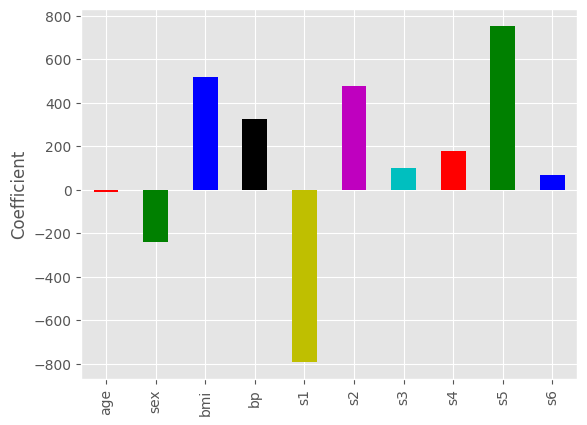

In [699]:
coef=pd.Series(lr.coef_ , index=diabetes.feature_names)
coef.plot(kind='bar', color = list('rgbkymc'))
plt.ylabel('Coefficient')

Some of those coefficients are very large, and it looks like age does not contribute as much as the others

The very large coefficients can often be problematic so we'll have to think about this one again later

Maybe removing age will give us a better model

We don't really have enough knowledge to figure it out, from past stuff I've done, you would get a better model without age, s3, s4 and s6. Maybe we'll look into that later

In [700]:
X = data.drop(["age"], axis=1)

In [701]:
lr = LinearRegression()
lr.fit(X,y)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [702]:
lr.score(X,y)

0.5177170179957553

In [703]:
r_squared = lr.score(X,y)

r2 score is the same, but your lecturer said it should be better. Well R2 is not always the best, there is an adjusted r2

In [704]:
adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
adjusted_r_squared

0.5076694558706669

Slightly better than the model with age included.

There are lots of other metrics that could be used, some could be better than others, typically we look at multiple ones to make our determination

Would Root Mean Squared Error be useful? Probably should use a validation set to do some model selection